<a href="https://colab.research.google.com/github/Hyun3246/Code-Warehouse/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [4]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ", len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


## K-Fold 교차검증

In [5]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])

    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))

sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830232, 34.07824620925938)

## K-Fold 교차검증

`cross_val_score`를 사용하면 조금 더 편리함.

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830232, -34.07824620925938)

In [9]:
from sklearn.model_selection import cross_validate
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores = cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00414515, 0.0012486 , 0.00119352, 0.0010848 , 0.00103998,
        0.00111389, 0.00112724, 0.00103664, 0.0023787 , 0.00191998]),
 'score_time': array([0.00232482, 0.00118542, 0.00109148, 0.00107813, 0.00105739,
        0.00109124, 0.00108361, 0.00121641, 0.00156069, 0.0017662 ]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits = 10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-28.234759011737474, -23.938347528563718)

## Leave One Out

In [11]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [12]:
loo = LeaveOneOut()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049338, -23.862836317209972)

## 모델 간 비교

In [13]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

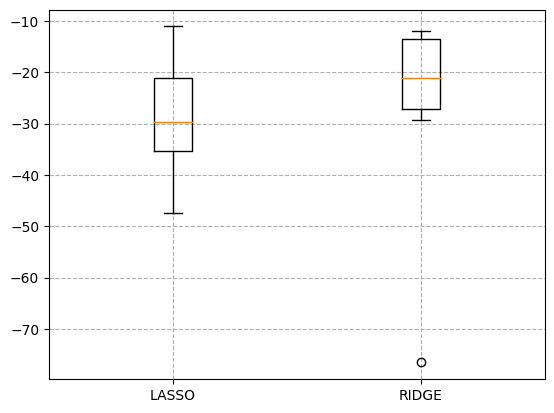

In [14]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

## Dev set (Val set)

In [15]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01
max_iter = 100

In [18]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)

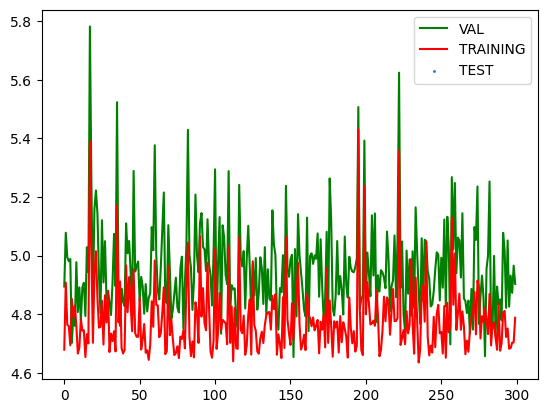

In [20]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="g", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [21]:
np.argsort(rmse_val_score)

array([152, 279, 256,   5, 286, 269, 104, 226, 162, 283, 142, 271,  79,
       284, 115,  37,   7, 275, 236, 101, 207, 290,  11, 172,  71, 114,
       154, 160,   6, 175,  14, 230, 179,  31, 225, 134, 185, 124, 146,
        53,  24, 267, 141,  76,   9,  55, 216,  85, 128, 159,  72,  45,
       178, 110, 120, 196, 293, 232,  75, 253, 295, 243,  40,  98, 244,
       288, 132,  36,  68,  30,  39,  50, 266, 238, 268, 249, 137,  67,
        19, 289,  63, 197,  28, 136, 265, 200, 173, 278,  56, 188, 220,
       169, 203, 276, 126, 198, 180, 182,  73, 228,  57, 297, 129, 144,
       209, 245,  29, 235,  62, 184, 158, 112, 270,  38, 113, 213, 223,
       143, 251,  10,  12, 287,   0, 217,  52,  34, 171, 111, 187, 108,
        54, 299,  80,  32,  13,  26,  86, 218, 242, 212,  74, 263,  51,
       149,  23, 183, 277, 296, 205,  97, 208, 107, 260, 202, 157,  16,
        89, 192, 211,  47,  44, 191,  94, 241, 210,  70, 135, 246, 148,
       280,  77, 131, 190,  64,  84, 193, 123, 118,  48, 298,  9

In [22]:
rmse(y_test,sgd_regressor.predict(X_test))

4.921335583804232

In [23]:
rmse(y_test,model_list[152].predict(X_test))

4.857570030709529

In [24]:
model_list[0].coef_

array([-1.36095247,  0.6634076 ,  0.21866986,  0.90928746, -2.35075302,
        3.4488205 ,  0.10464749, -3.31389732,  1.85314201, -1.392132  ,
       -2.25531067,  1.05823666, -3.5653295 ])